In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25


In [2]:
data = 'accra.csv'
df = pd.read_csv(data)

In [3]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])
df['day_name'] = df['date'].dt.day_name()
df["week"] = df["date"].dt.isocalendar().week

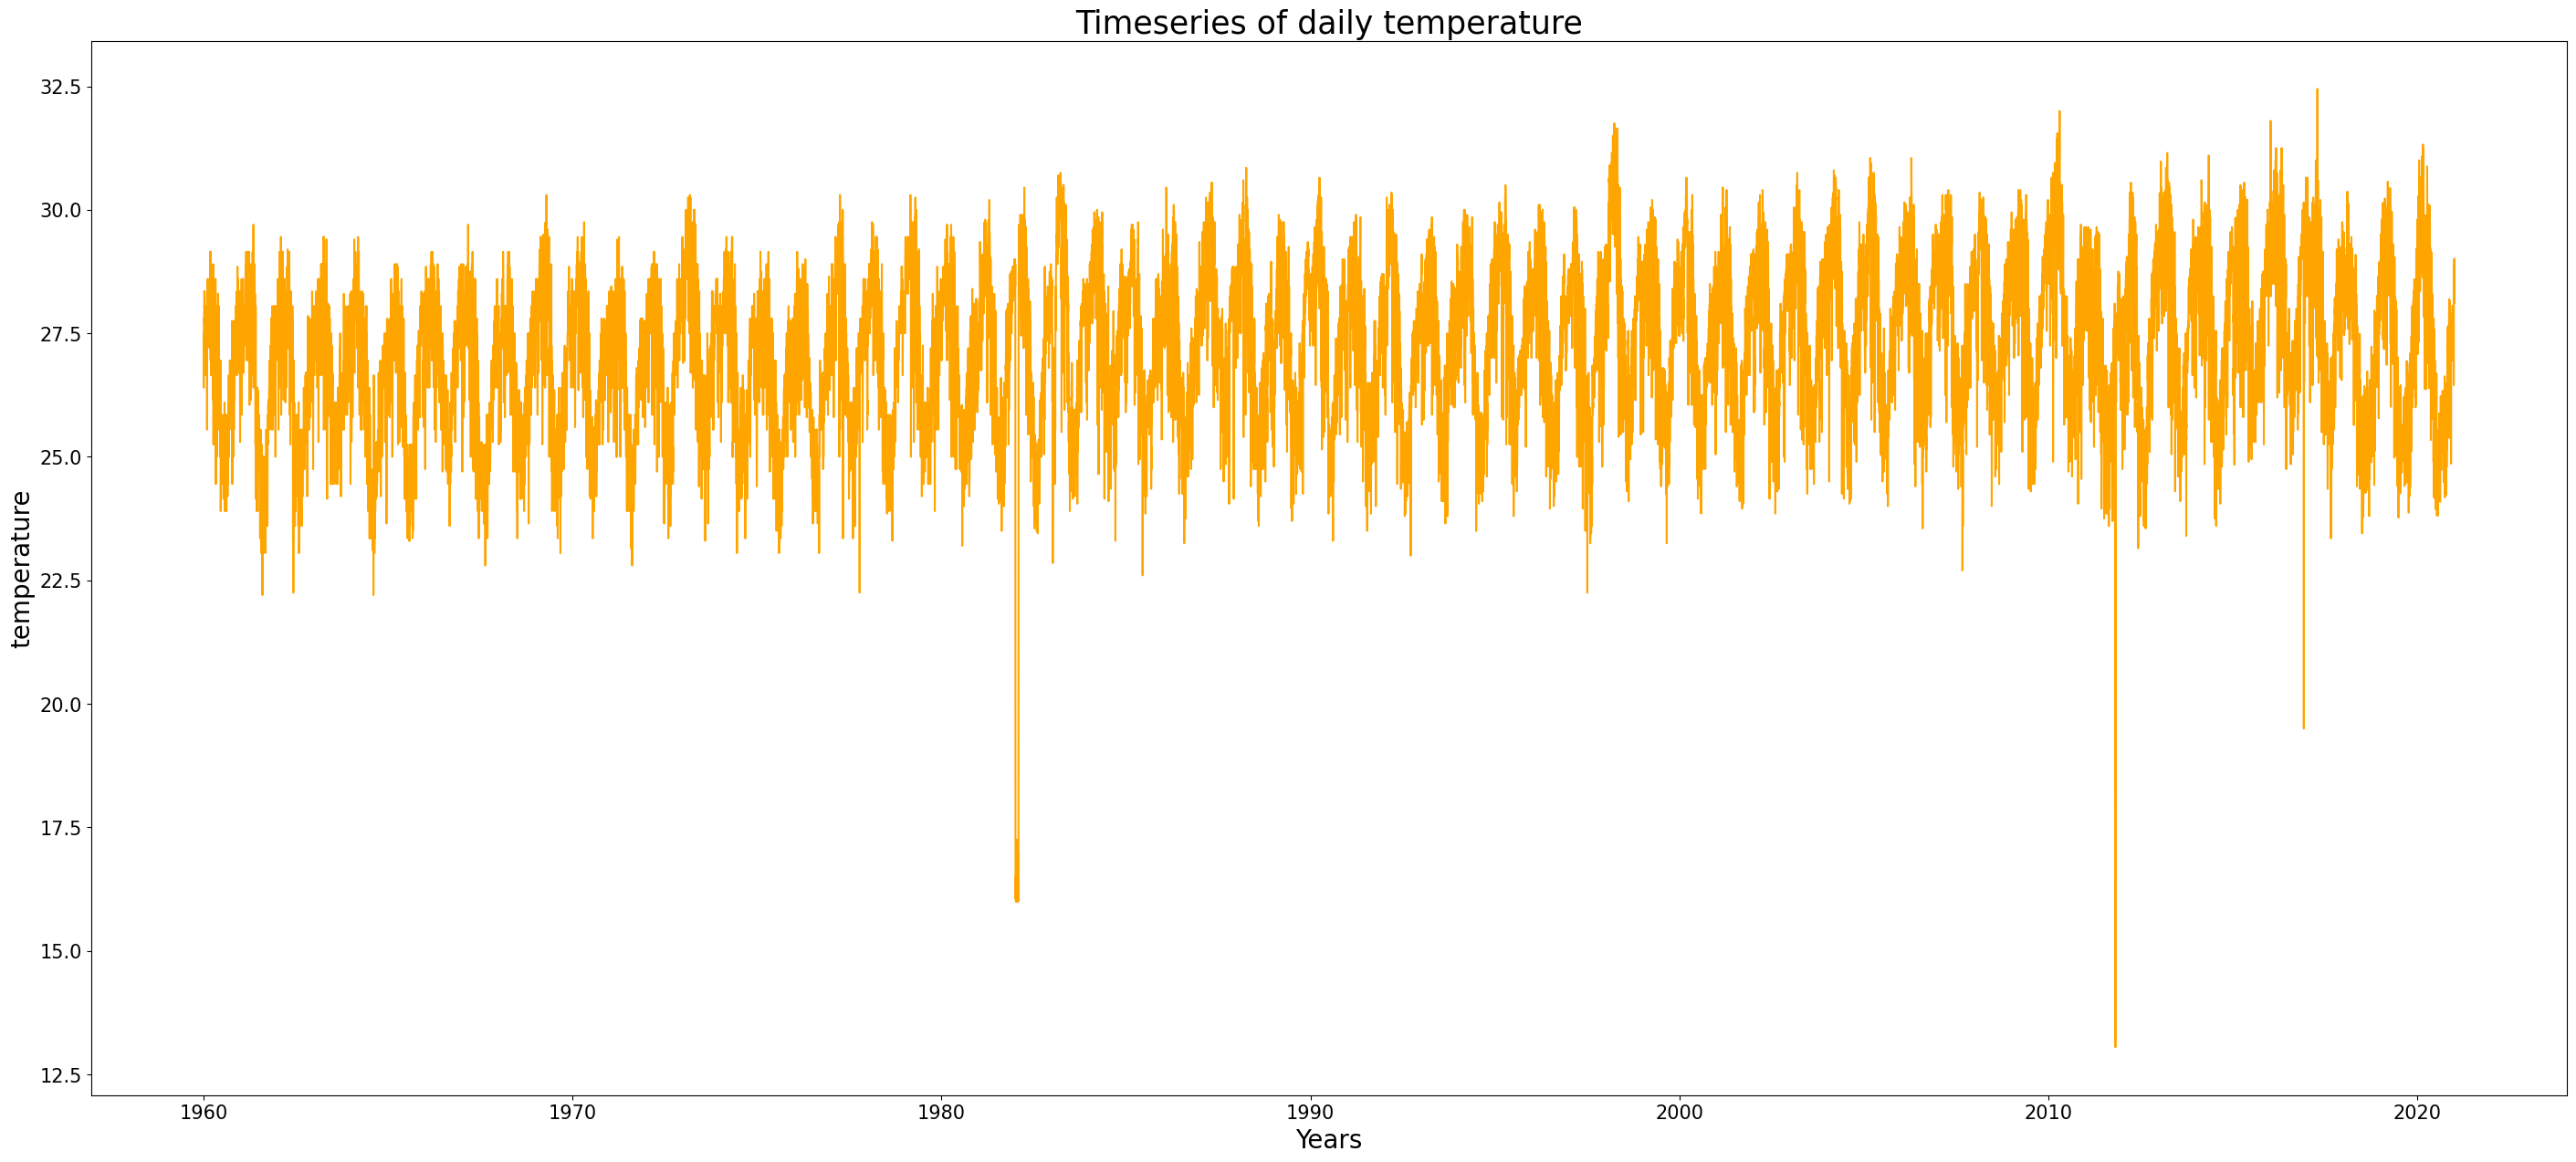

In [4]:
# plot time series of daily temperature
plt.rcParams["figure.figsize"] = (35, 15)
plt.plot(df['date'], df['temperature'], color='orange')  # plot data
plt.xlabel('Years')  # label x-axis
plt.xticks(fontsize=15)# set x-axis ticks font size
plt.yticks(fontsize=15)# set y-axis ticks font size
plt.ylabel('temperature')  # label y-axis
plt.title('Timeseries of daily temperature')  # title
plt.savefig('results/timeseries_temperature.jpg')  # save figure
plt.show()


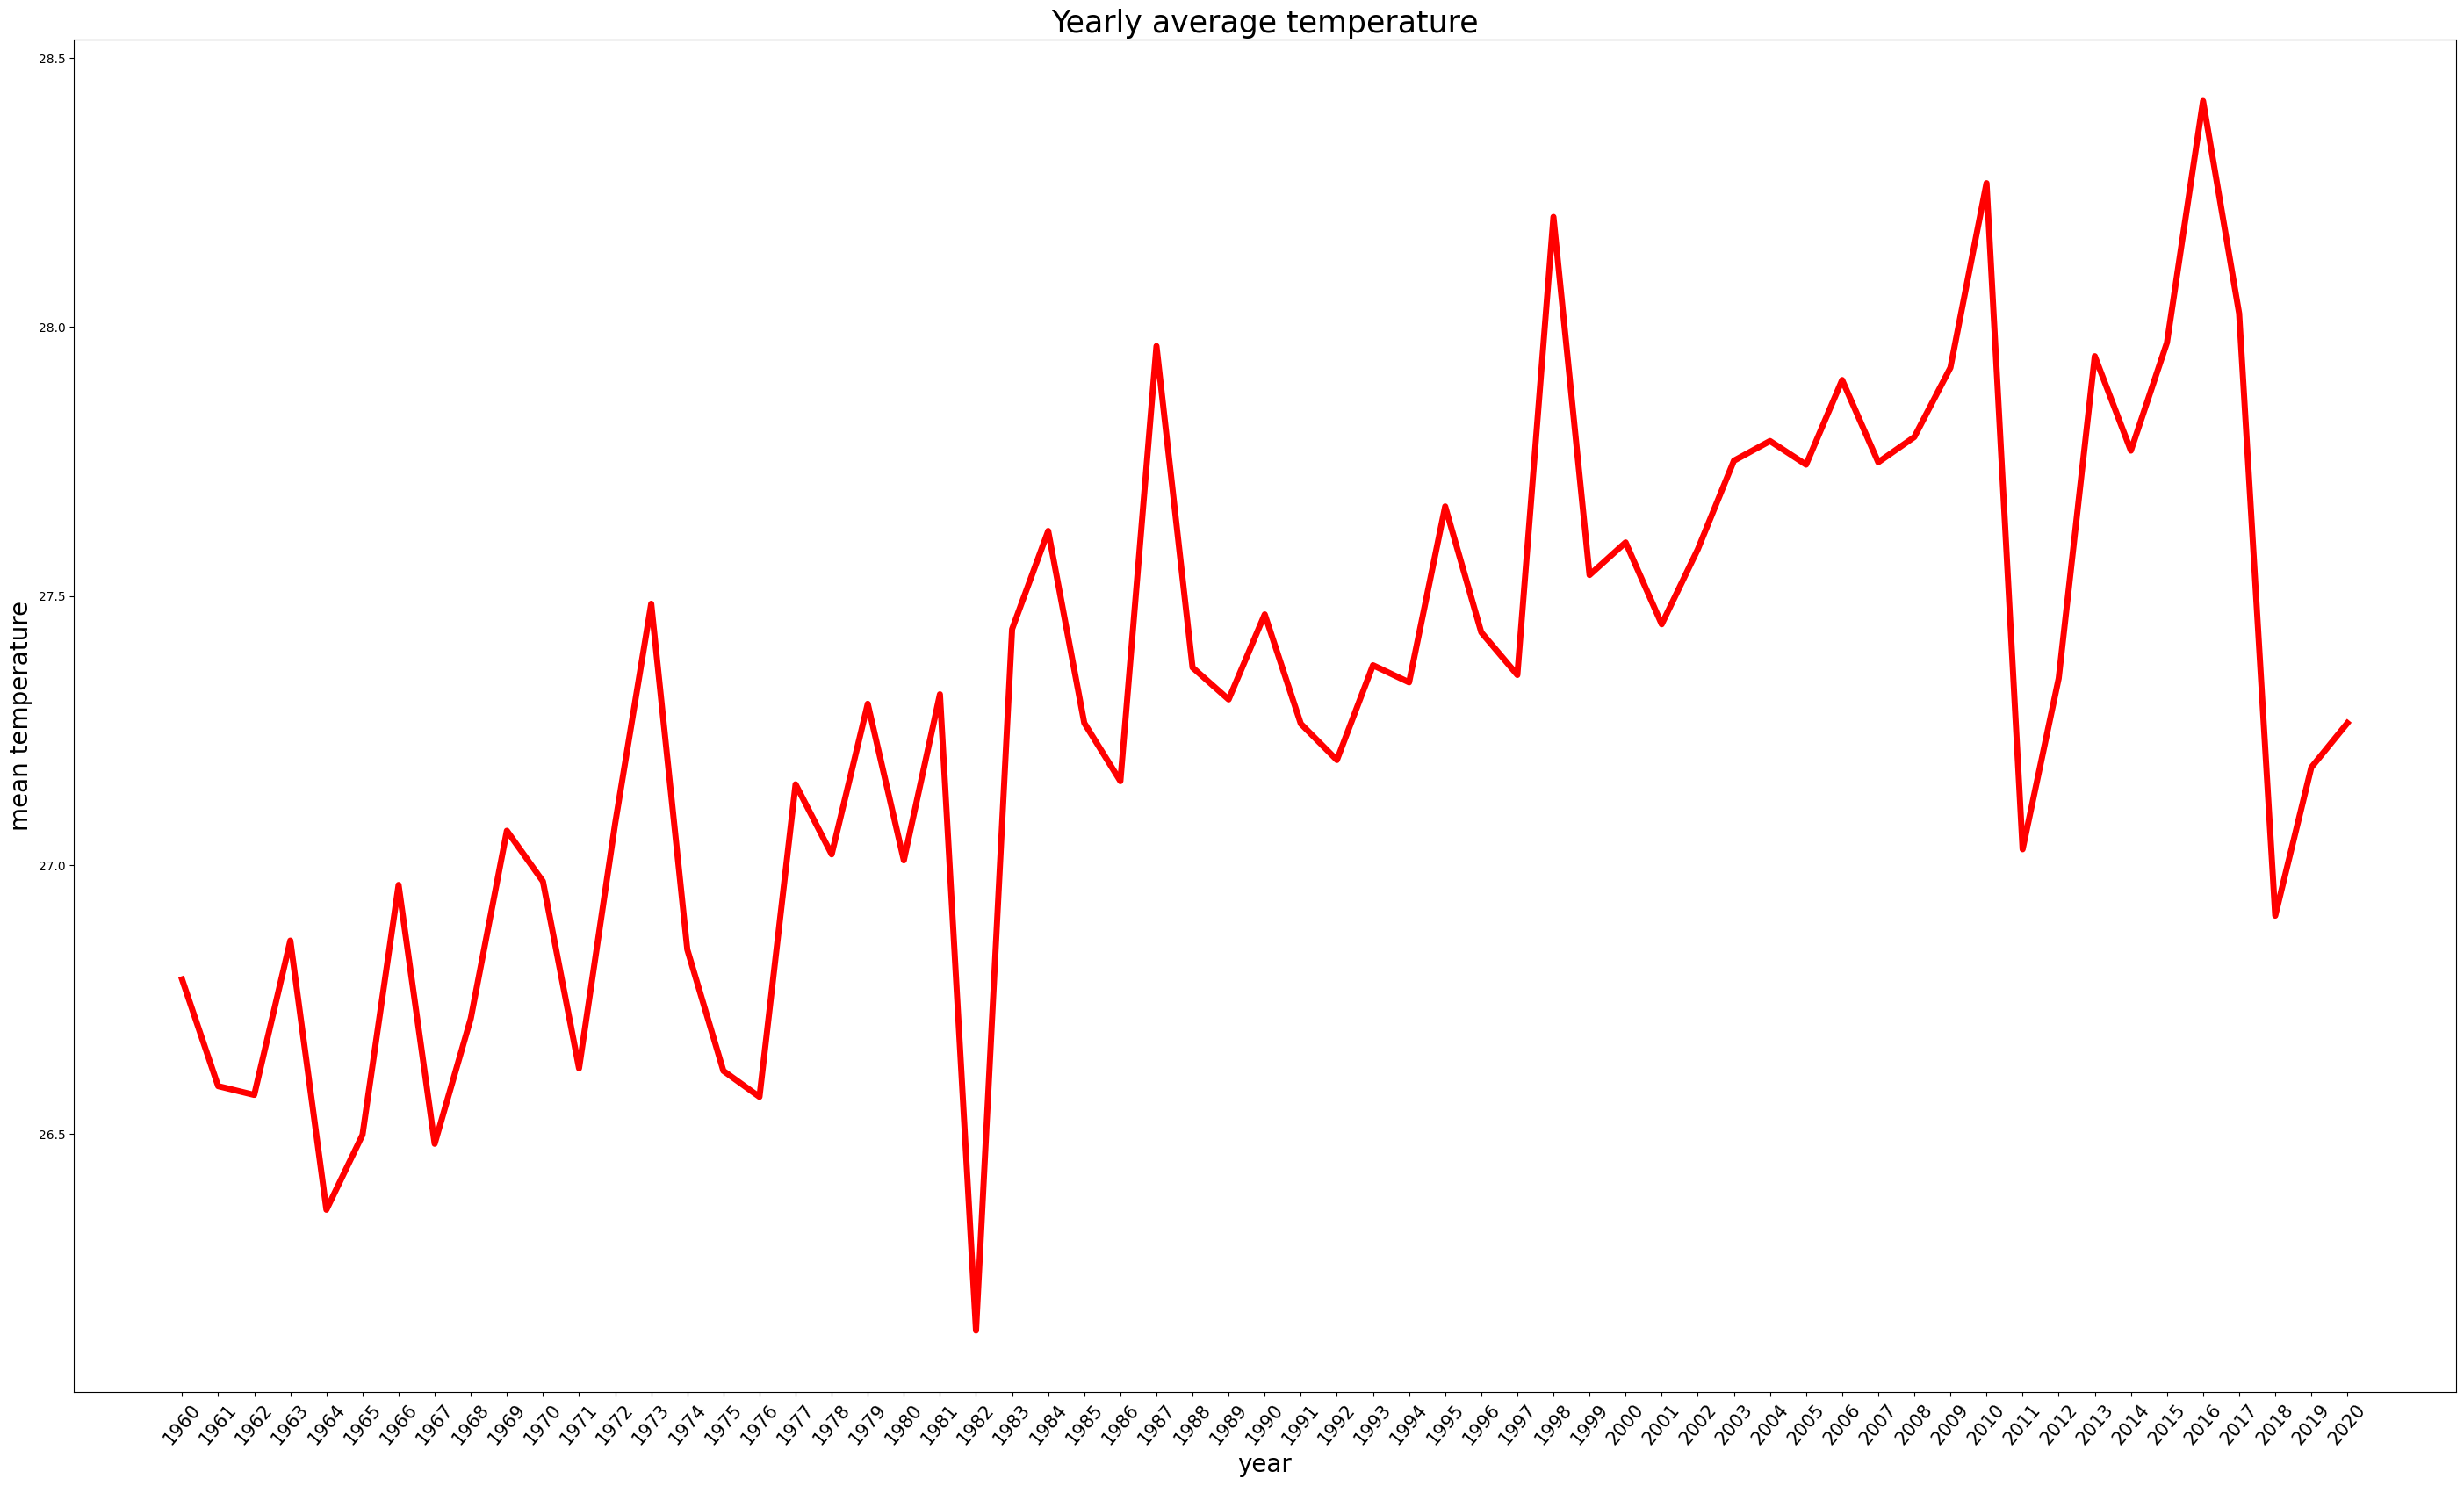

In [21]:
#plot yearly average temperature

yearly_mean = df.groupby('year')['temperature'].mean()

plt.rcParams["figure.figsize"] = (35, 20)
plt.xlabel('year')  # label x-axis
plt.ylabel('mean temperature')  # label y-axis
plt.title('Yearly average temperature')  # title
plt.xticks(yearly_mean.index, rotation=50, fontsize=15)# rotate x-axis labels
#plt.bar(yearly_mean.index ,yearly_mean, color='red', linewidth=5)  # plot data
#plot line of best fit

#plot yearly average temperature with trend line
plt.plot(yearly_mean.index, yearly_mean, color='red', linewidth=5)  # plot data
#plot trend line
#plt.plot(yearly_mean.index, np.poly1d(np.polyfit(yearly_mean.index, yearly_mean, 1))(yearly_mean.index), color='blue', linewidth=5)  # plot data

#plt.plot(np.unique(yearly_mean.index), np.poly1d(np.polyfit(yearly_mean.index, yearly_mean, 1))(np.unique(yearly_mean.index)), color='blue', linewidth=5)
plt.savefig('results/yearly_mean.jpg')  # save figure
plt.show()

# write yearly mean to csv
f = open('results/yearly_mean.csv', 'w')
f.write('year,mean\n')
f.write('\n'.join(['{},{}'.format(k, v) for k, v in yearly_mean[1:].items()]))
f.close()


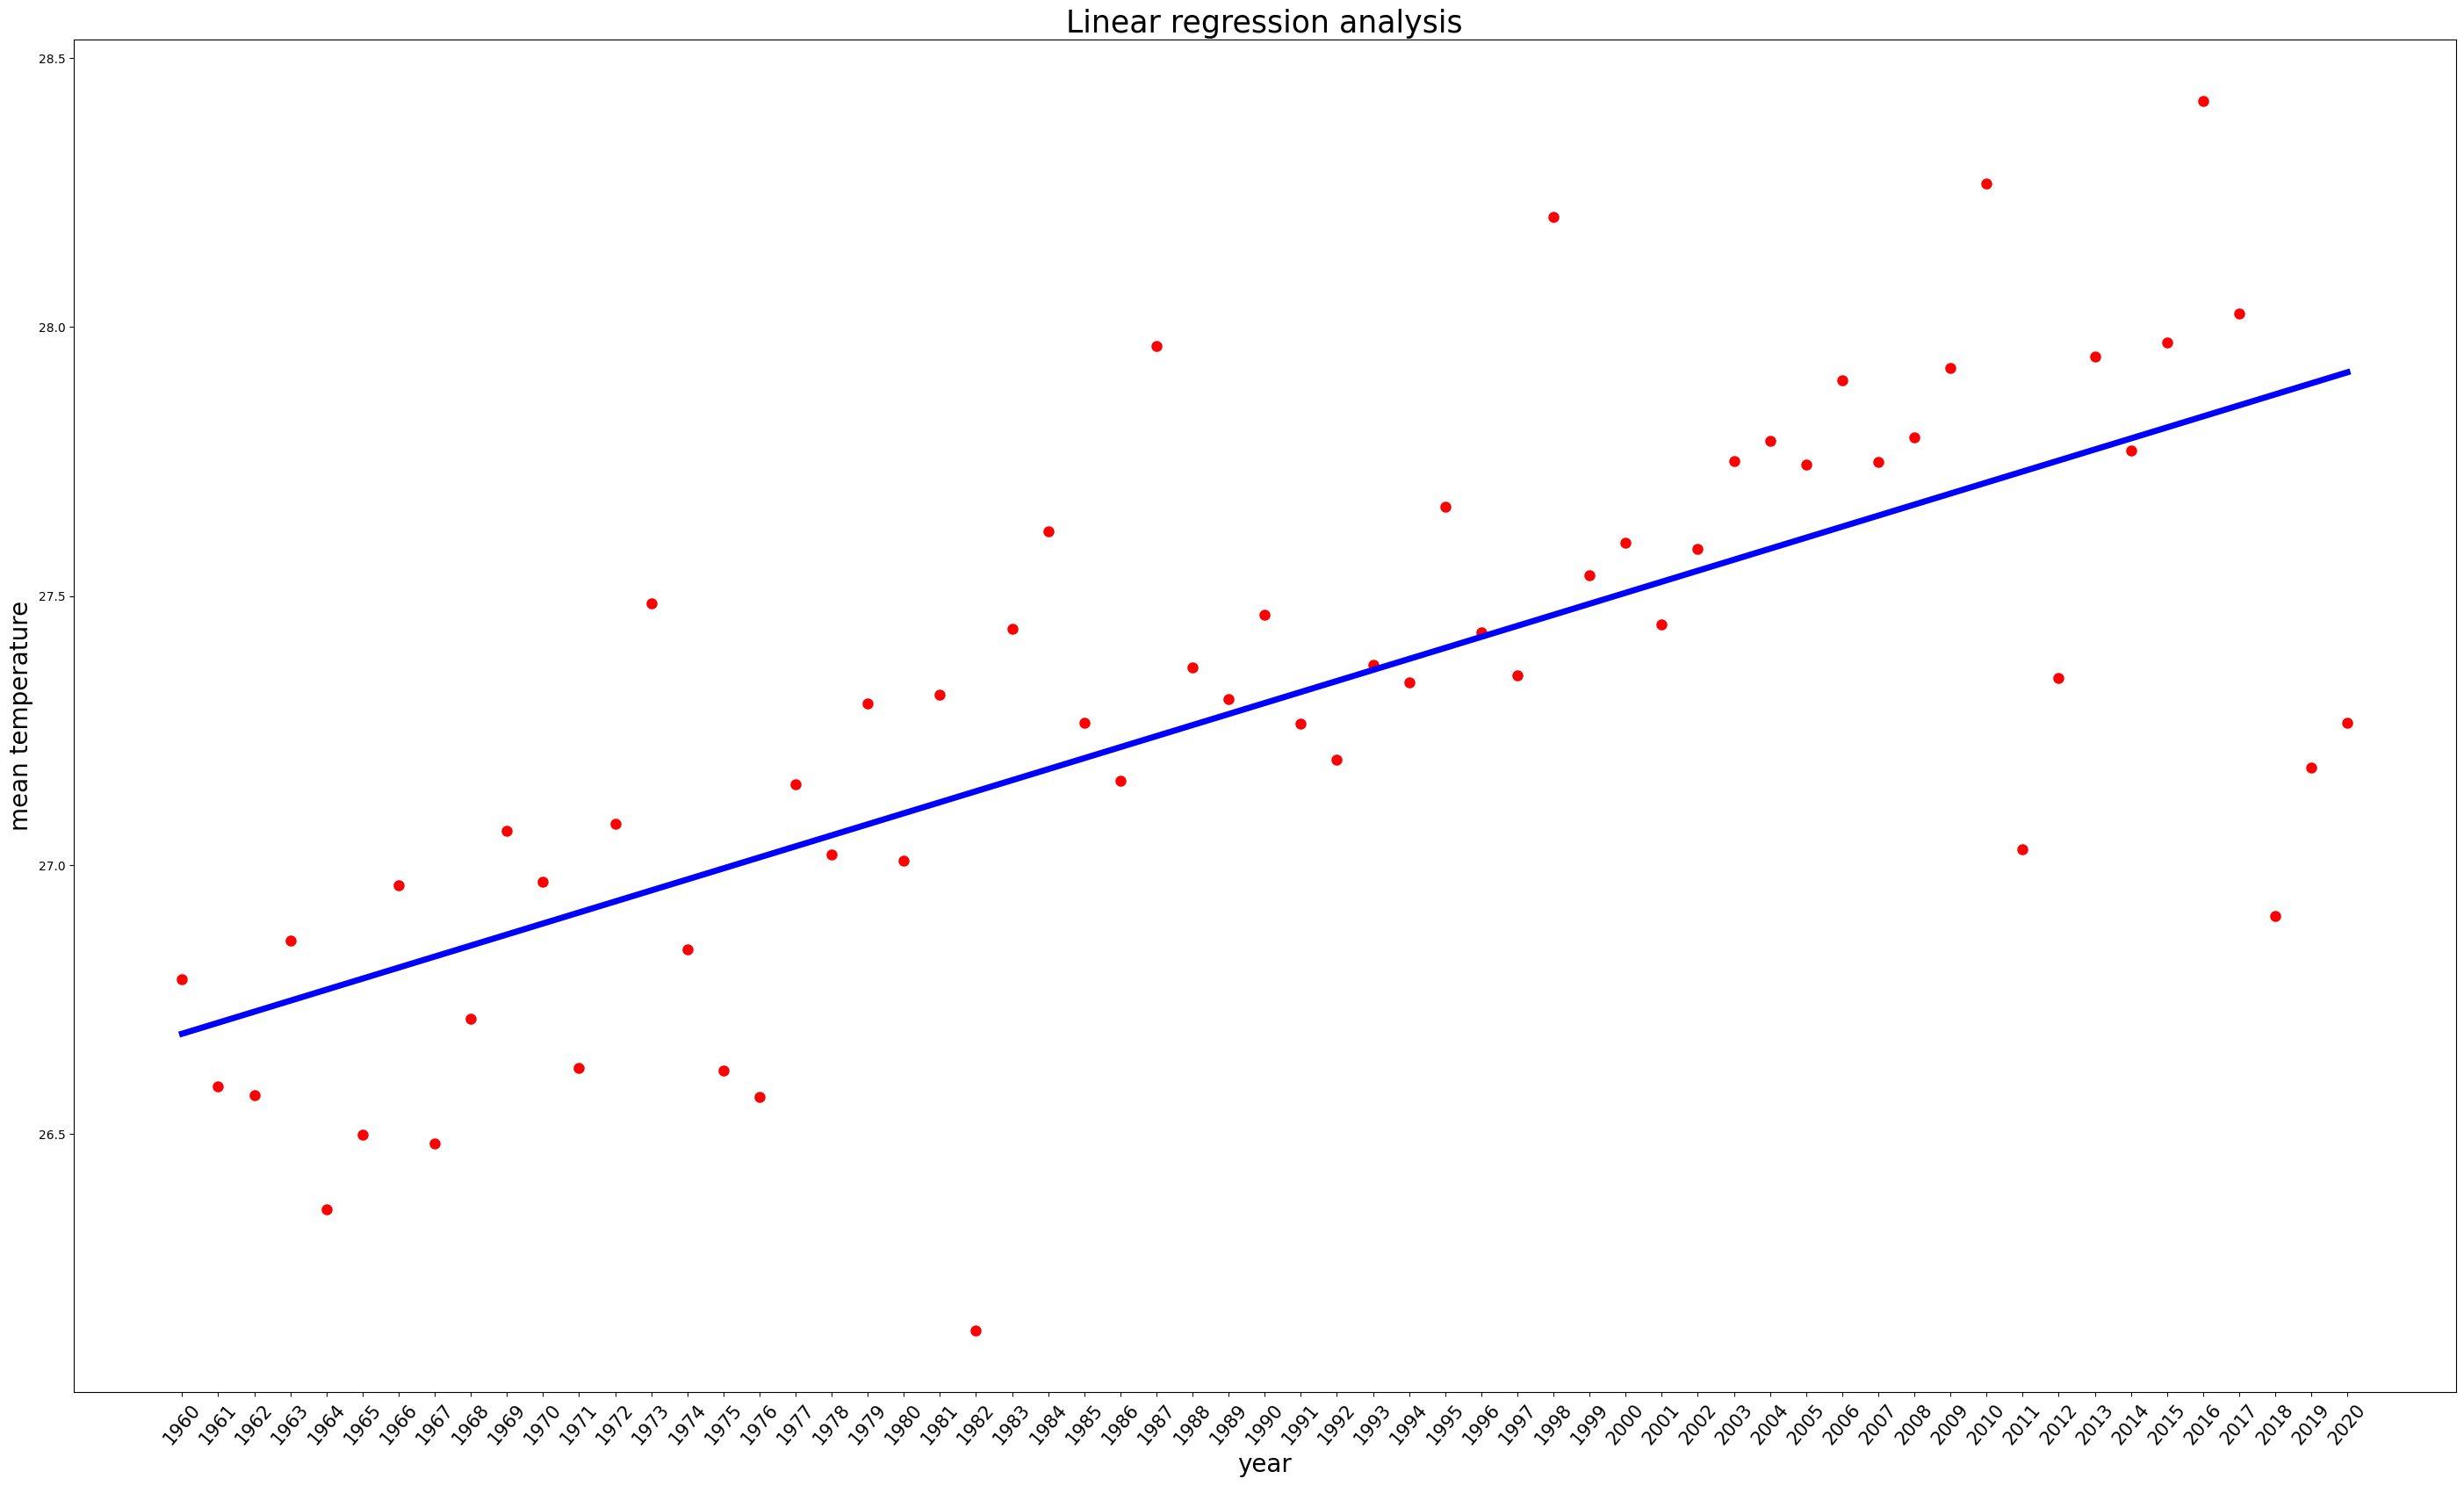

In [6]:
yearly_mean = df.groupby('year')['temperature'].mean()

plt.rcParams["figure.figsize"] = (35, 20)
plt.xlabel('year')  # label x-axis
plt.ylabel('mean temperature')  # label y-axis
plt.title('Linear regression analysis')  # title
plt.xticks(yearly_mean.index, rotation=50, fontsize=15)  # rotate x-axis labels
plt.scatter(yearly_mean.index, yearly_mean, color='red', linewidth=3)  # plot data
#plot line of best fit
plt.plot(np.unique(yearly_mean.index), np.poly1d(np.polyfit(yearly_mean.index, yearly_mean, 1))(np.unique(yearly_mean.index)), color='blue', linewidth=5)
plt.savefig('results/yearly_scatter_plot.jpg')  # save figure
plt.show()


In [7]:
#find the rate of change of temperature
rate = np.polyfit(yearly_mean.index, yearly_mean.values, 1)[0]
rate = round(rate, 2)
rate*100

2.0

In [8]:
#%pip install pymannkendall


You should consider upgrading via the '/Users/jerrybuaba/Desktop/kitchen/air-temperature-analysis/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pymannkendall as mk

results = mk.original_test(df['temperature'])
trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(yearly_mean.values)

print('trend: ', trend)
print('h: ', h)
print('p: ', p)

trend:  increasing
h:  True
p:  9.291301061864488e-11


In [17]:
#%pip install statsmodels

  Using cached statsmodels-0.13.2-cp39-cp39-macosx_11_0_arm64.whl (9.1 MB)
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
You should consider upgrading via the '/Users/jerrybuaba/Desktop/kitchen/air-temperature-analysis/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


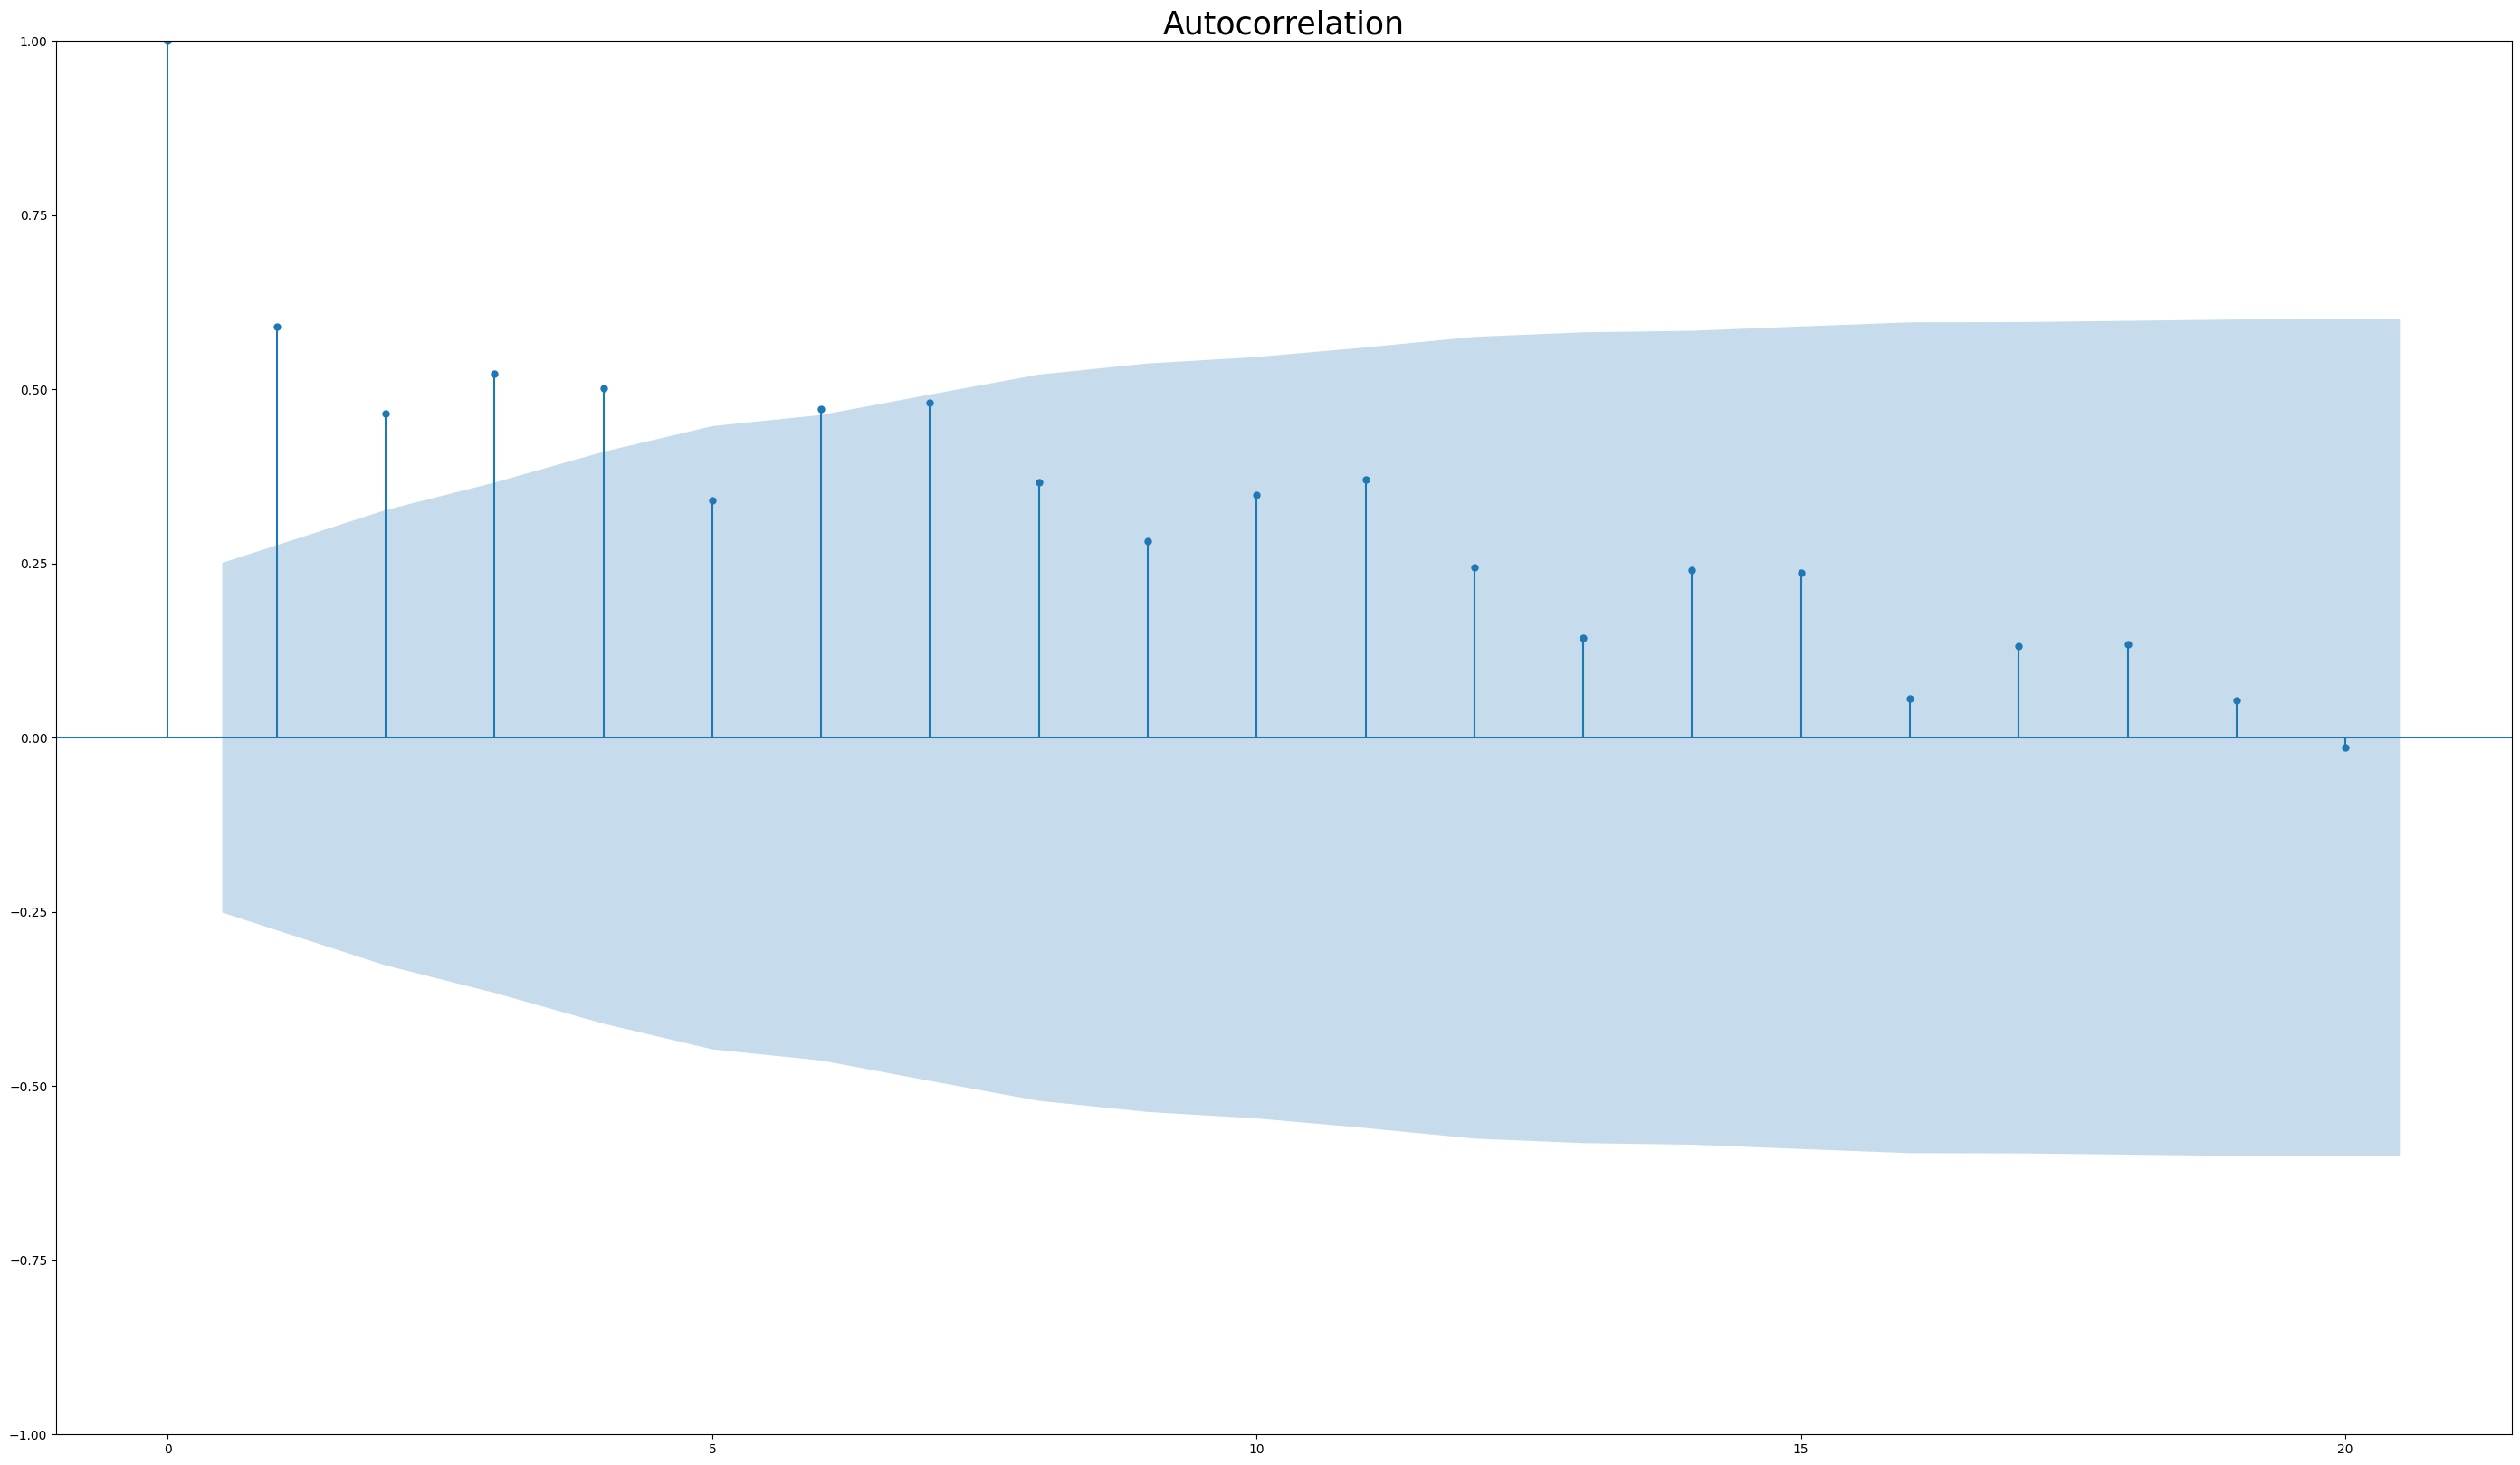

In [20]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(yearly_mean, lags=20)
plt.show()